<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Data_Exploratory_and_Ploting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Import libaray</a></li>
        <li><a href="#pre-processing">Data Loading</a></li>
         <li><a href="#pre-processing">Preprocessing</a></li>
        <li><a href="#evaluation">Data Exploring 
        <ul>
        <li><a href="#evaluation">Dtale</a></li>
        <li><a href="#evaluation">Lux</a></li>
        <li><a href="#evaluation">Pandas Profiling</a></li>
         <li><a href="#evaluation">Logistic Regression</a></li>
         <li><a href="#evaluation">KNN</a></li>
         <li><a href="#evaluation">Naive Bayes</a></li>
         <li><a href="#evaluation">Deep Neural Multilayer Perceptron (MLP)</a></li>
         <li><a href="#evaluation">Gradient Boosting</a></li>
         <li><a href="#evaluation">ExtraTreesClassifier</a></li>
         <li><a href="#evaluation">LGBM Classifer</a></li>
         <li><a href="#evaluation">CatBoost</a></li>
    </ul>
</div>
<br>
<hr>


# **Introduction**

# **Import libaray**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **Data Loading**

**Load data from google drive** 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv")

In [4]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# **Preprocessing**

**Check Missing Value**


In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
salary,67,0.311628
status,0,0.000000
mba_p,0,0.000000
specialisation,0,0.000000


In [6]:
missing_v = [col for col in data.columns if (data[col].isnull().sum()/data.shape[0]) * 100 > 0.001]
print(len(missing_v))
for cols in missing_v:
    del data[cols]

1


In [7]:
np.sum(data.isnull().any(axis=1))

0

**Hot Encoding**

In [8]:
data.select_dtypes(include=['object']).columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [9]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])




In [10]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [ ]:
data

**Feature Scaling**

In [11]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(data)
data = pd.DataFrame(r_scaler.transform(data), index=data.index, columns=data.columns)

**Data spliting**


In [12]:
X=data.drop('specialisation',axis=1)


In [13]:
y=data[['specialisation']]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


#**Data Exploring**

## **Dtale**

In [ ]:
!pip install dtale

In [ ]:
import dtale
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datasets/Recommended System/Placement_Data_Full_Class.csv")
d = dtale.show(df, ignore_duplicate=True)
d

http://4ce9203885b8:40000/dtale/main/1

## **Chartify** [4]

Chartify is a visualization library that aims to make it as easy as possible for data scientists to create charts. It comes with user-friendly syntax and consistent data formatting compared to other tools. It takes less time to create beautiful and quick charts. This was developed by Spotify labs.
Here, I am showing only the bar chart. For more details and charts, please check this documentation and notebook

In [ ]:
!pip install chartify


In [18]:
# importing necessary library
import numpy as np
import pandas as pd
import chartify
#loading example dataset from chartify
data = chartify.examples.example_data()
data.head()

,date,country,fruit,unit_price,quantity,total_price
0,2017-10-21,US,Banana,0.303711,4,1.214846
1,2017-05-30,JP,Banana,0.254109,4,1.016436
2,2017-05-21,CA,Banana,0.268635,4,1.074539
3,2017-09-18,BR,Grape,2.215277,2,4.430554
4,2017-12-08,US,Banana,0.308337,5,1.541687


In [17]:
# Calculating total quanity for each fruits
quantity_by_fruit = (data.groupby(‘fruit’)[‘quantity’].sum().reset_index())
ch = chartify.Chart(blank_labels=True, x_axis_type=’categorical’)
ch.set_title(“Vertical bar plot”)
ch.set_subtitle(“Automatically sorts by value counts.”)
ch.plot.bar(
 data_frame=quantity_by_fruit,
 categorical_columns=’fruit’,
 numeric_column=’quantity’)
ch.show()

SyntaxError: ignored

## **Lux**

In [ ]:
!pip install lux-api


In [ ]:
!pip install git+https://github.com/lux-org/lux.git


In [ ]:
import pandas as pd
import lux

In [ ]:
df = pd.read_csv("https://github.com/lux-org/lux-datasets/blob/master/data/hpi_full.csv?raw=True")

In [ ]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df.intent = ["Inequality","AvrgLifeExpectancy"]

In [ ]:
df

## **Pandas Profiling**

In [ ]:
!pip install pandas-profiling

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np

In [ ]:
pandas_profiling.ProfileReport(df)

**Sweetviz**

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz
import pandas as pd
my_report  = sweetviz.analyze([data,'Train'], target_feat='specialisation')
my_report.show_html('FinalReport.html')

**Autoviz**

It stands for Automatically Visualize. Visualization is possible with any size of the dataset with a few lines of code.

In [ ]:
!pip install autoviz

     |████████████████████████████████| 44 kB 2.9 MB/s 


Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (215, 15)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  6
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
 

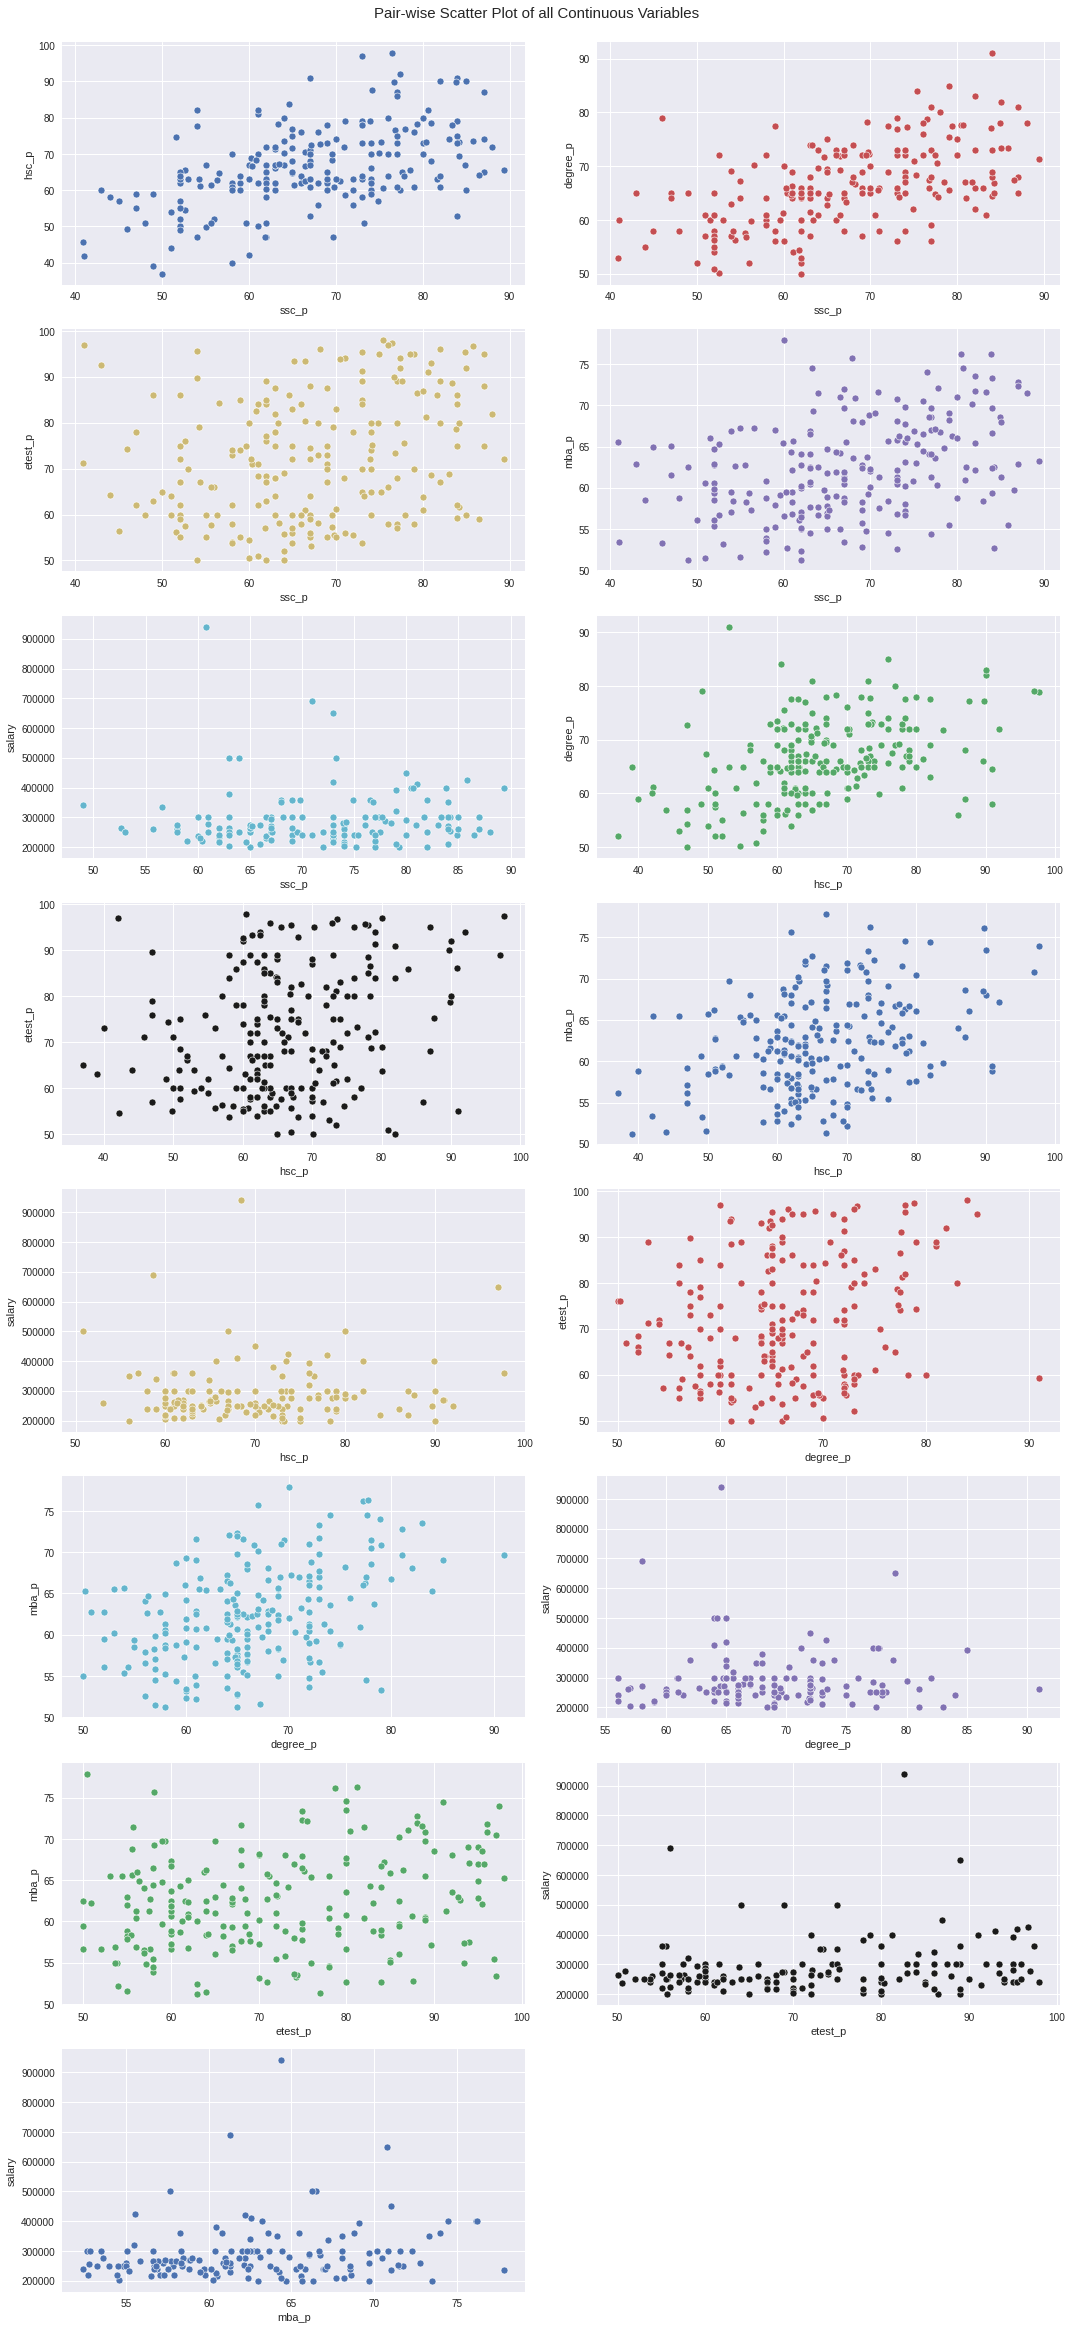

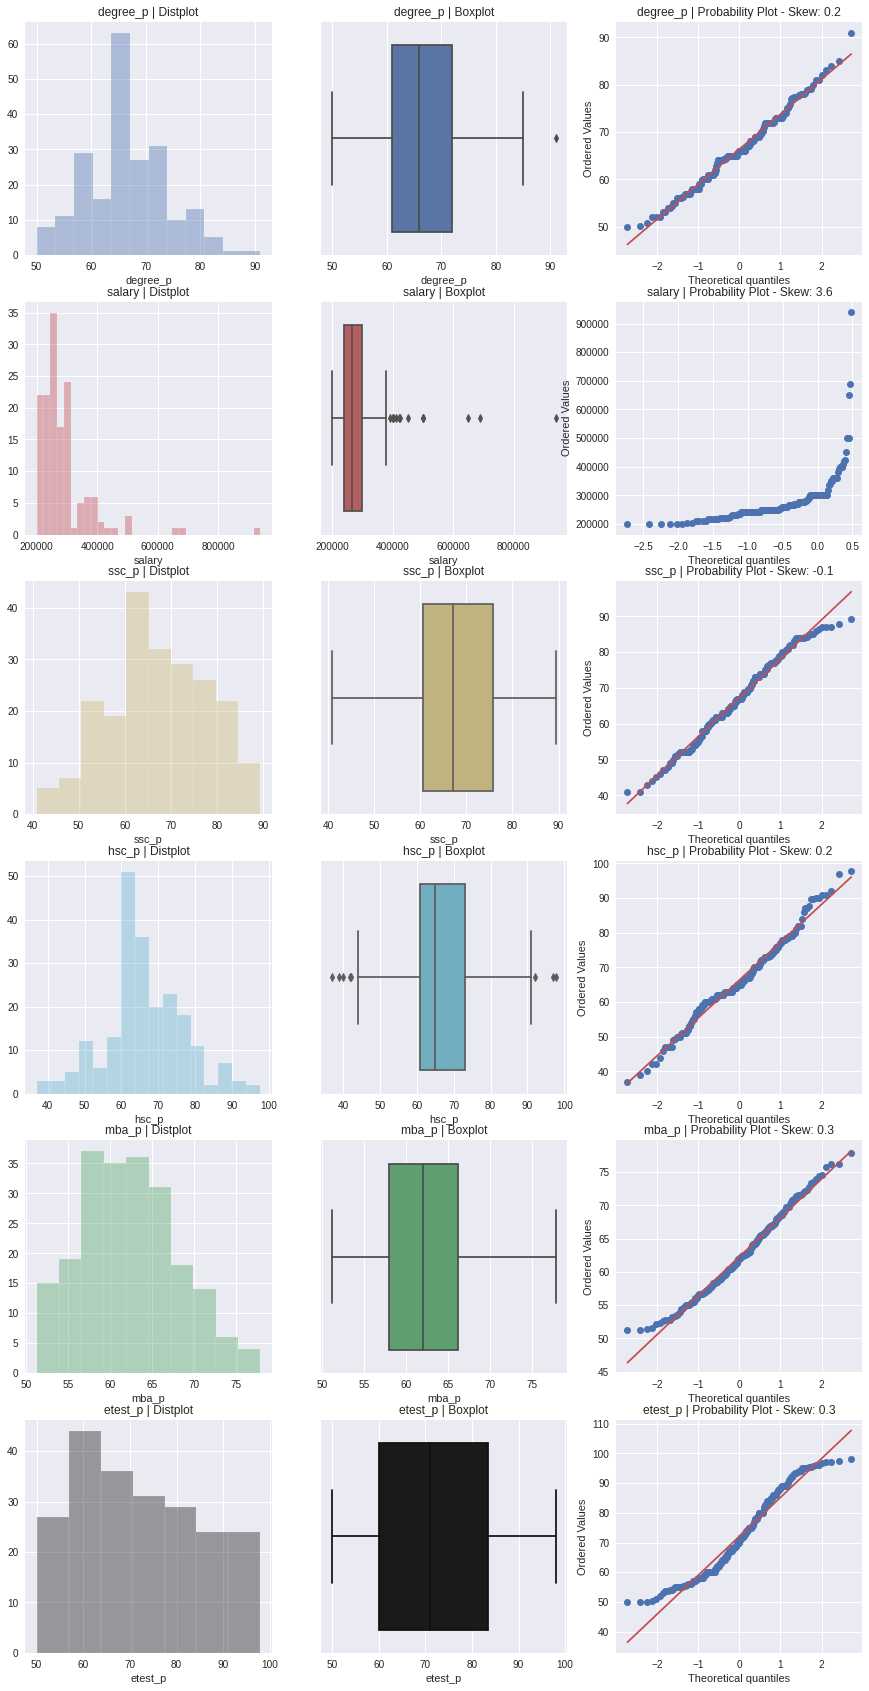

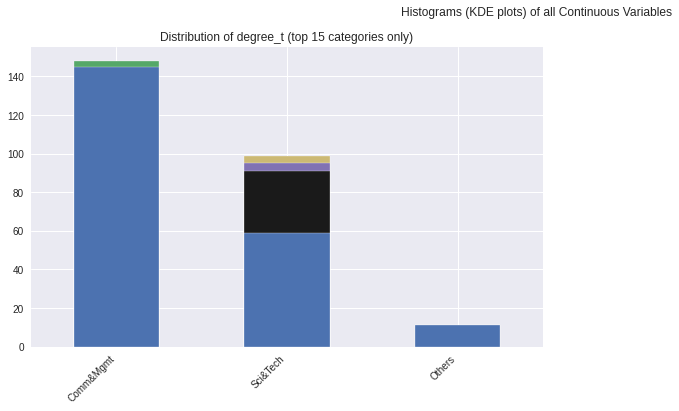

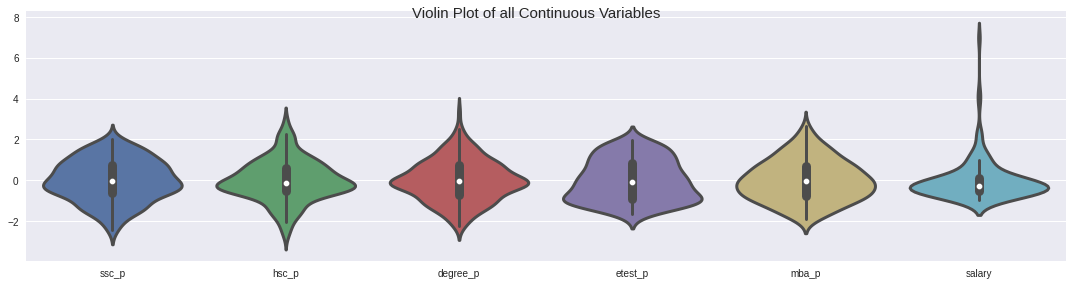

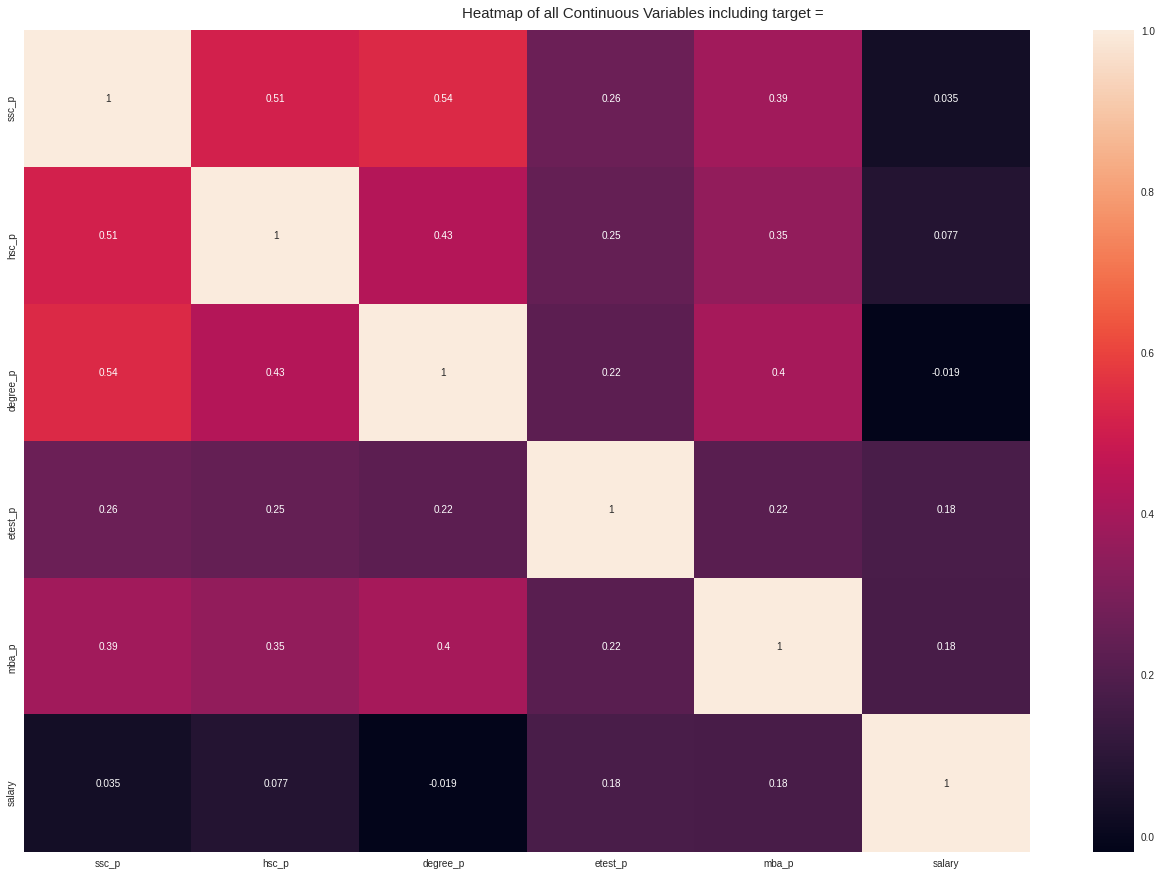

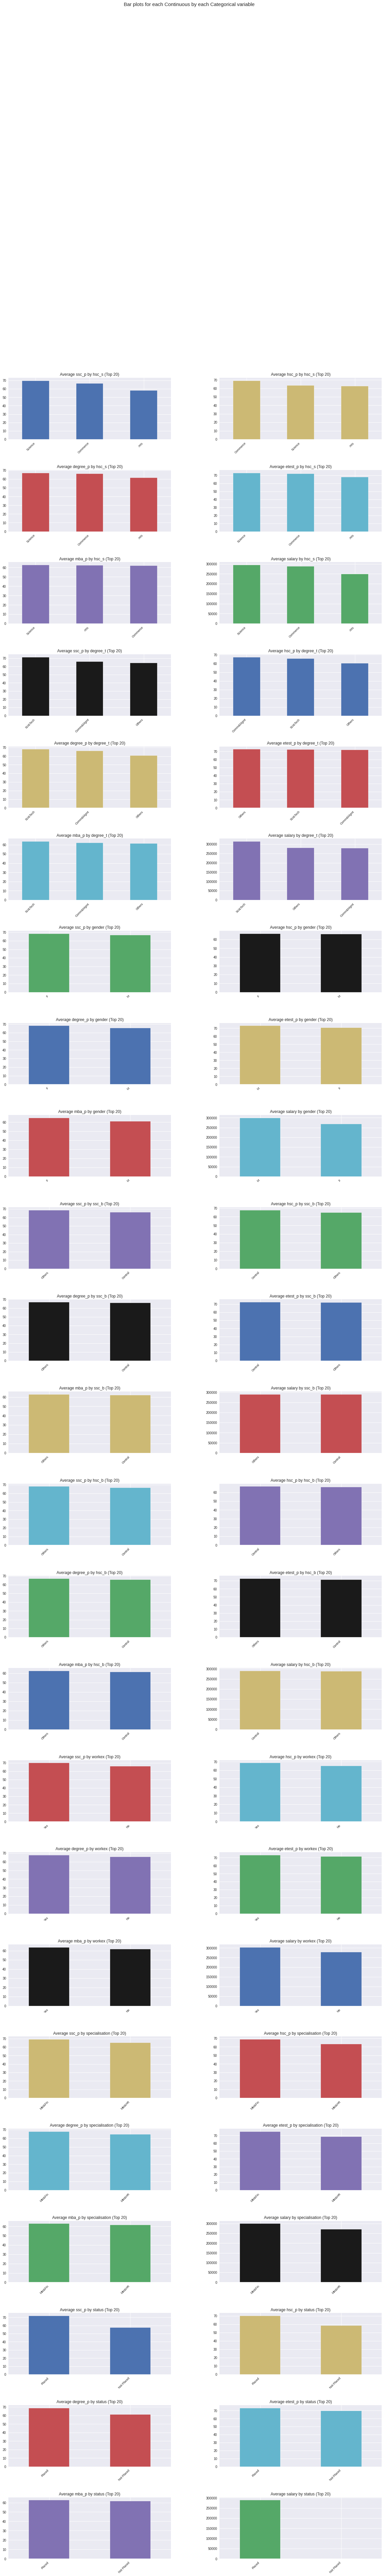

Time to run AutoViz (in seconds) = 16.593

 ###################### VISUALIZATION Completed ########################


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('/content/drive/MyDrive/Datasets/Recommended System/Placement_Data_Full_Class.csv')

# **References**

[1- Top Python Libraries to Automate Exploratory Data Analysis in 2021](https://www.analyticsvidhya.com/blog/2021/04/top-python-libraries-to-automate-exploratory-data-analysis-in-2021/)

[2-Exploratory Data Analysis With One-Line of Code](https://medium.com/geekculture/exploratory-data-analysis-with-one-line-of-code-f4a8e0a55f56)

[3-Handy Data Visualization Functions in matplotlib & Seaborn to Speed Up Your EDA](https://betterprogramming.pub/handy-data-visualization-functions-in-matplotlib-seaborn-to-speed-up-your-eda-241ba0a9c47d)

[4-Five Cool Python Libraries for Data Science](https://pub.towardsai.net/five-cool-python-libraries-for-data-science-7f1fce402b90)

[Bamboolib: One of the Most Useful Python Libraries You Have Ever Seen](https://towardsdatascience.com/bamboolib-one-of-the-most-useful-python-libraries-you-have-ever-seen-6ce331685bb7)

[The Quickest Guide to Data Visualization in Python using Matplotlib](https://medium.com/mlearning-ai/the-quickest-guide-to-data-visualization-in-python-using-matplotlib-a6a079b5de07)